# 02. 결정 트리

<br>

# 0. 결정 트리의 주요 개념

## 0.1 결정 트리(Decision Tree)

ML 알고리즘 중 직관적으로 이해하기 쉬운 알고리즘  
데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리(Tree) 기반의 분류 규칙을 만드는 것  
데이터의 어떤 기준을 바탕으로 규칙을 만들어야 가장 효율적인 분류가 될 것인가가 알고리즘의 성능을 크게 좌우

<br>

## 0.2 결정 트리의 구조

- **규칙 노드(Decision Node)**
  - 규칙 조건이 되는 것
  - 데이터 세트에 있는 피처가 결합해 규칙 조건을 만들 때마다 규칙 노드가 만들어짐
  
  
- **리프 노드(Leaf Node)**
  - 결정된 클래스 값  
  
  
- **서브 트리(Sub Tree)**
  - 새로운 규칙 조건마다 서브 트리 생성

<br>

## 0.3 과적합

많은 규칙이 있다.  
$\rightarrow$ 분류를 결정하는 방식이 복잡해진다.  
$\rightarrow$ 과적합  
$\Rightarrow$ 트리의 깊이(depth)가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높다.

<br>

## 0.4 분할(Split)

가능한 한 적은 결정 노드로 높은 예측 정확도를 가지려면 데이터를 분류할 때 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해저야 한다.  
$\rightarrow$ 어떻게 트리를 **분할(Split)**할 것인가가 중요  
$\Rightarrow$ 최대한 균일한 데이터 세트를 구성할 수 있도록 분할하는 것이 필요

<br>

## 0.5 균일도

각각 3가지 종류의 데이터 세트들 중 가장 균일한 데이터 세트는?

- A : 검은공과 하얀공이 비슷한 비율로 섞여 있음
- B : 검은공이 하얀공보다 많이 있음
- C : 검은공으로만 이루어져 있음  
  
  
$\Rightarrow$ C $\rightarrow$ B $\rightarrow$ A

C 데이터 세트의 균일도가 가장 높다.  
A 데이터 세트의 균일도가 가장 낮다.

데이터 세트의 균일도는 데이터를 구분하는 데 필요한 정보의 양에 영향을 미친다.  

- C 데이터 세트에서 하나의 데이터를 뽑았을 경우  
: 검은공으로 쉽게 예측 가능  
  
  
- A 데이터 세트에서 하나의 데이터를 뽑았을 경우  
: 상대적으로 혼잡도가 높고 균일도가 낮기 때문에 같은 조건에서 데이터를 판단하는 데 있어 더 많은 정보가 필요

<br>

## 0.6 데이터 분류 방식

정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있는 규칙 조건을 만듬  
정보 균일도가 높은 데이터 세트로 쪼개질 수 있도록 조건을 찾아 서브 데이터 세트를 만듬  
다시 이 서브 데이터 세트에서 균일도가 높은 자식 데이터 세트를 쪼개는 방식으로 트리를 내려가면서 반복하는 방식으로 데이터 값을 예측

<br>

## 0.7 정보의 균일도를 측정하는 방법

1. 엔트로피를 이용한 정보 이득(Information Gain) 지수
2. 지니 계수

> [ratsgo's blog - 의사결정나무](https://ratsgo.github.io/machine%20learning/2017/03/26/tree/) 포스트 내용을 참고하였습니다.

<br>

### 0.7.1 정보 이득 지수
- 정보 이득은 엔트로피 개념을 기반으로 함
- 1에서 엔트로피 지수를 뺸 값 (i.e. 1 - 엔트로피 지수)
- 결정 트리는 이 정보 이득 지수로 분할 기준을 정함
- 정보 이득이 높은 속성을 기분으로 분할

### 엔트로피(entropy)

- 주어진 데이터 집합의 혼잡도를 의미
- 서로 다른 값이 섞여 있다 $\rightarrow$ 엔트로피(복잡도)가 높음
- 같은 값이 섞여 있다 $\rightarrow$ 엔트로피(복잡도)가 낮음

<br>

**엔트로피 계산**

A 영역 : 오렌지 박스로 둘러쌓인 영역

전체 데이터의 개수 = 16 (m=16)  
빨간색 동그라미의 개수 = 10 (범주1의 데이터 개수 = 10)  
파란색 동그라미의 개수 = 6 (범주2의 데이터 개수 = 6)

<div style="text-align: left; margin-left: 10px;">
    <img src="./images/Ch04/02/img003.jpg" width="300px"/>
</div>

m개의 레코드가 속하는 A영역에 대한 엔트로피는 아래와 같은 식으로 정의됨  
($p_k$ : A영역에 속하는 레코드 가운데 $k$ 범주에 속하는 레코드 비율)

$
\qquad
Entropy(A) = - \sum_{k=1}^{m} p_k \; log_2 \left(p_k\right)
$

<br>

A 영역의 엔트로피  

$
\qquad
Entropy(A) = - {10 \over 16} log_2 \left({10 \over 16}\right) - {6 \over 16} log_2 \left({6 \over 16}\right) \approx 0.95
$

<br>

A 영역에 빨간색 점선을 그어 두 개의 부분집합(R1, R2)으로 분할한다고 가정  
두 개 이상 영역에 대한 엔트로피 공식 :  
  
  
$
\qquad
Entropy(A) = \sum_{i=1}^{d} R_i \left( - \sum_{k=1}^{m} p_k \; log_2 \left(p_k\right) \right)
$

<br>

이 공식에 의해 분할 후 A 영역의 엔트로피를 아래와 같이 각각 구할 수 있음  
($R_i$ : 분할 전 레코드 가운데 분할 후 $i$ 영역에 속하는 레코드의 비율)

$
\qquad
Entropy(A) = 0.5\times \left( -\frac { 7 }{ 8 } \log _{ 2 }{ (\frac { 7 }{ 8 } ) } -\frac { 1 }{ 8 } \log _{ 2 }{ (\frac { 1 }{ 8 } ) }  \right) +0.5\times \left( -\frac { 3 }{ 8 } \log _{ 2 }{ (\frac { 3 }{ 8 } ) } -\frac { 5 }{ 8 } \log _{ 2 }{ (\frac { 5 }{ 8 } ) }  \right) \approx 0.75
$

<br>

분기 전 엔트로피 0.95가 분할한 후 0.75로 감소.  
0.2 만큼 엔트로피 감소(=불확실성 감소 = 순도 증가 = 정보획득)  
$\rightarrow$ 결정 트리 모델은 분할한 것이 분할 전보다 낫다는 판단 하에 데이터를 두 개의 부분집합으로 나누게 된다.

결정 트리는 구분 뒤 영역의 순도(homogeneity)가 증가하거나 불확실성(엔트로피)가 최대한 감소하도록 하는 방향으로 학습을 진행

A 영역에 속한 모든 레코드가 동일한 범주에 속할 경우 (=불확실성 최소 = 순도 최대)  
$\Rightarrow$ 엔트로피 = 1

범주가 둘 뿐이고 해당 개체의 수가 동일하게 반반씩 섞여 있을 경우 (= 불확실성 최대 = 순도 최소)  
$\Rightarrow$ 엔트로피 = 0

<br>

### 0.7.2 지니 계수

- 경제학에서 불평등 지수를 나타낼 때 사용하는 계수
- 지니 계수 = 0 : 가장 평등
- 지니 계수 = 1 : 가장 불평등
- 머신러닝에 적용될 때는 의미론적으로 재해석 됨
  - 데이터가 다양한 값을 가질수록(다양성이 높음) 평등한 값
  - 데이터가 특정 값으로 쏠릴 경우(다양성이 낮음) 불평등한 값  
  $\Rightarrow$ 다양성이 낮을수록 균일도가 높다.  
  $\Rightarrow$ 지니 계수가 1로 갈수록 균일도가 높다.
- 지니 계수가 높은 속성을 기준으로 분할

<br>

**지니 계수 공식**

$
\qquad
G.I(A)=\sum _{ i=1 }^{ d }{ { \left( { R }_{ i }\left( 1-\sum _{ k=1 }^{ m }{ { p }_{ ik }^{ 2 } }  \right)  \right)  } }
$

<br>

## 0.8 `DecisionTreeClassifier`

결정 트리 알고리즘을 사이킷런에서 구현  
기본적으로 지니 계수를 이용해 데이터 세트를 분할  

<br>

## 0.9 결정 트리의 일반적인 알고리즘

데이터 세트를 분할하는 데 가장 좋은 조건, 즉 정보 이득이나 지니 계수가 높은 조건을 찾아서 자식 트리 노드에 걸쳐 반복적으로 분할  
데이터가 모두 특정 분류에 속하게 되면 분할을 멈추고 분류를 결정

<div style="text-align: left; margin-left: 30px;">
    <img src="./images/Ch04/02/img001.jpg" width="600px"/>
</div>

<br>

# 1. 결정 트리 모델의 특징

## 1.1 장점

- 정보의 **균일도**라는 룰을 기반으로 함
- 알고리즘이 쉽고 직관적이라는 점
- 결정 트리가 룰이 매우 명확
- 이에 기반해 어떻게 규칙 노드와 리프 노드가 만들어지는 지 알 수 있음
- 시각화로 표현까지 할 수 있다.
- 정보의 균일도만 신경 쓰면 되므로 특별한 경우를 제외하고는 각 피처의 스케일링과 정규화 같은 전처리 작업이 필요 없음

<br>

## 1.2 단점

- 과적합으로 정확도가 떨어진다.
- 피처 정보의 균일도에 따른 룰 규칙으로 서브 트리를 계속 만들다 보면 피처가 많고 균일도가 다양하게 존재할 수록 트리의 깊이가 커지고 복잡해질 수 밖에 없다.
- 모든 데이터 상황을 만족하는 완벽한 규칙을 만들지 못하는 경우가 더 많음
- 하지만 결정 트리는 학습 데이터 기반 모델의 정확도를 높이기 위해 계속해서 조건을 추가하면서 트리 깊이가 계속 커짐
- 결과적으로 복잡한 학습 모델에 이르게 됨
- 복잡한 학습 모델은 실제 상황(테스트 데이터 세트)에 유연하게 대처할 수 없음  
(예측 성능 떨어짐)
- **트리의 크기를 사전에 제한하는 것**이 오히려 성능 튜닝에 더 도움이 됨

<br>

# 2. 결정 트리 파라미터

사이킷런은 결정 트리 알고리즘을 구현한 아래의 2가지 클래스를 제공  
  
  
`DecisionTreeClassifier`  
- 분류를 위한 클래스  
  
  
`DecisionTreeRegressor`
- 회귀를 위한 클래스

사이킷런의 결정 트리 구현은 **CART(Classification And Regression Trees)** 알고리즘 기반이다.  
(CART는 분류와 회귀에서 사용될 수 있는 트리 알고리즘)

`DecisionTreeClassifier`와 `DecisionTreeRegressor`는 동일한 파라미터를 사용

<br>

## 2.1 결정 트리의 파라미터 종류 (5가지)

1) `min_samples_split`  
2) `min_samples_leaf`  
3) `max_features`  
4) `max_depth`  
5) `max_leaf_nodes`

<br>

### 2.1.1 `min_samples_split`

- 노드를 분할하기 위한 최소한의 샘플 데이터 수
- 과적합을 제어하는 데 사용
- 디폴트 : 2
- 값을 작게 설정할수록 분할되는 노드가 많아져 과적합 가능성 증가
- 과적합을 제어할 수 있는 파라미터

<br>

### 2.1.2 `min_samples_leaf`

- 말단 노드(Leaf)가 되기 위한 최소한의 샘플 데이터 수
- 과적합을 제어할 수 있는 파라미터 (`min_samples_split`과 유사)
- 그러나 비대칭적(imbalanced) 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 이 경우는 작게 설정 필요

<br>

### 2.1.3 `max_features`

- 최적의 분할을 위해 고려할 최대 피처 개수
- 디폴트 : None
- 값의 종류
  - `None` : 데이터 세트의 모든 피처를 사용해 분할 수행
  - int형 : 대상 피처의 개수
  - float형 : 전체 피처 중 대상 피처의 퍼센트
  - `sqrt` : $\sqrt{전체 \, 피처 \, 개수}$
  - `auto` : `sqrt`와 동일

<br>

### 2.1.4 `max_depth`

- 트리의 최대 깊이 지정
- 디폴트 : None
- None : 완벽하게 클래스 결정 값이 될 때까지 깊이를 계속 키우며 분할하거나 노드가 가지는 데이터 개수가 `min_samples_split`보다 작아질때까지 계속 깊이를 증가시킴
- 깊이가 깊어지면 `min_samples_split` 설정대로 최대 분할하여 과적합할 수 있음
- 따라서 적절한 값으로 제어 필요

<br>

### 2.1.5 `max_leaf_nodes`

- 말단 노드(Leaf)의 최대 개수

<br>

# 3. 결정 트리 모델의 시각화

`Graphviz` 패키지  
  
  
- 결정 트리 알고리즘이 어떤 규칙을 가지고 트리를 생성하는 지 시각적으로 보여주는 패키지
- 원래 dot 파일로 기술된 다양한 이미지를 쉽게 시각화할 수 있는 패키지
- 사이킷런은 `Graphviz` 패키지와 쉽게 인터페이스할 수 있도록 `export_graphviz()` API를 제공

<br>

사이킷런의 `export_graphviz()`  
  
  
- 함수 인자
  - 학습이 완료된 Estimator
  - 피처의 이름 리스트
  - 레이블 이름 리스트
- 위의 값들을 입력하면 학습된 결정 트리 규칙을 실제 트리 형태로 시각화

<br>

## 3.1 붓꽃 데이터 세트에 Graphviz 패키지 적용

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터 로딩
iris_data = load_iris()

# 학습, 테스트 분리
X_train, X_test, y_train, y_test = train_test_split(iris_data.data,
                                                    iris_data.target,
                                                    test_size=0.2,
                                                    random_state=11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=156, splitter='best')

In [15]:
# 정확도 확인
from sklearn.metrics import accuracy_score

pred = dt_clf.predict(X_test)
print('기본 DecisionTreeClassifier의 정확도 : {:.4f}'.format(accuracy_score(pred, y_test)))

기본 DecisionTreeClassifier의 정확도 : 0.9333


<br>

`export_graphviz()`

- Graphviz가 읽어 들여서 그래프 형태로 시각화할 수 있는 출력 파일 생성

In [16]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일 생성
export_graphviz(dt_clf, out_file="tree.dot", 
                class_names=iris_data.target_names,
                feature_names=iris_data.feature_names,
                impurity=True, filled=True)

<br>

생성된 출력 파일 `tree.dot`을 `Graphviz`의 파이썬 래퍼 모듈을 호출해 결정 트리의 규칙을 시각적으로 표현

In [17]:
import os

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

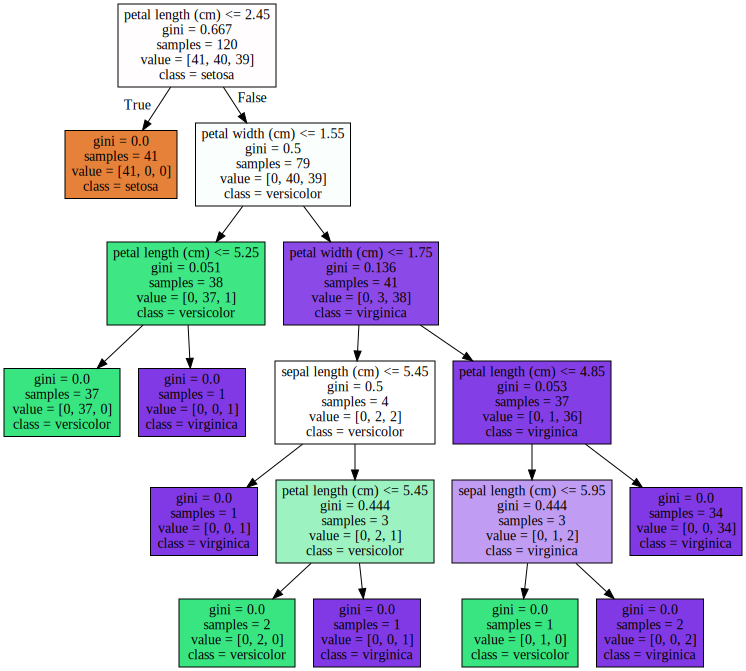

In [18]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 시각화
with open("tree.dot") as f :
    dot_graph = f.read()
graphviz.Source(dot_graph)

각 규칙에 따라 트리의 브랜치(branch) 노드와 말단 리프(leaf) 노드가 어떻게 구성되는 지 확인 가능

<br>

### 3.1.1 노드의 종류

**1) 리프 노드**

- 더 이상 자식 노드가 없는 노드
- 최종 클래스(레이블) 값이 결정되는 노드
- 리프 노드가 되기 위한 조건 (2가지)
  - 오직 하나의 클래스 값으로 최종 데이터가 구성
  - 리프 노드가 될 수 있는 하이퍼 파라미터 조건 충족

<br>

**2) 브랜치 노드**

- 자식 노드가 있는 노드
- 자식 노드를 만들기 위한 **분할 규칙 조건**을 가지고 있음

<br>

### 3.1.2 노드 내에 기술된 지표의 의미 해석

1) `petal length (cm) <= 2.45`
- 피처의 조건이 있는 것
- 자식 노드를 만들기 위한 규칙 조건
- 이 조건이 없으면 리프 노드  
  
  
2) `gini`
- 다음의 `value = []`로 주어진 데이터 분포에서의 지니 계수  
  
  
3) `samples`
- 현 규칙에 해당하는 데이터 건수  
  
  
4) `value = []`
- 클래스 값 기반의 데이터 건수
- 붓꽃 데이터 세트는 클래스 값으로 0, 1, 2를 가지고 있음
  - 0 : Setosa
  - 1 : Versicolor
  - 2 : Vriginica
- `value = [41, 40, 39]`  
: 클래스 값의 순서로 Setosa 41개, Versicolor 40개, Virginica 39개로 데이터가 구성되어 있다.

<br>

### 3.1.3 각 노드별 의미 확인

<div style="text-align: left; margin-left: 30px;">
    <img src="./images/Ch04/02/img002.jpg" width="600px"/>
</div>

**1) 1번 노드**

루트 노드  
  
  
`samples = 120`  
- 전체 데이터가 120개  
  
  
`value = [41, 40, 39]`  
- Setosa 41개, Versicolor 40개, Virginica 39개로 데이터 구성  
  
  
`gini = 0.667`
- sample 120개가 `value = [41, 40, 39]` 분포도로 되어 있어 아래와 같이 계산됨  
  
  
`class = setosa`
- 하위 노드를 가질 경우에 setosa의 개수가 41개로 제일 많다는 의미

`petal length (cm) <= 2.45` 규칙이 True 또는 False로 분기하게 되면 2번, 3번 노드가 만들어 짐

<br>

**2) 2번 노드**

모든 데이터가 Setosa로 결정되므로 클래스가 결정된 리프 노드가 됨  
더 이상 2번 노드에서 규칙을 만들 필요가 없음  
  
  
2번 노드는 `petal length (cm) <= 2.45`가 `True`인 규칙으로 생성되는 리프 노드  
- 41개의 샘플 데이터 모두 Setosa이므로 예측 클래스는 Setosa로 결정
- 지니 계수는 0

<br>

**3) 3번 노드**

`Petal length (cm) <= 2.45`가 `False`인 규칙 노드  
79개의 샘플 데이터 중 Versicolor가 40개, Virginica가 39개로 여전히 지니 계수가 0.5로 높다.  
$\rightarrow$ 다음 자식 브랜치 노드로 분기할 규칙 필요

`petal width (cm) <= 1.55` 규칙으로 자식 노드 생성

<br>

**4) 4번 노드**

`Petal width (cm) <= 1.55`가 `True`인 규칙 노드  
38개의 샘플 데이터 중 Versicolor가 37개, Virginica가 1개로 대부분이 versicolor임  
지니 계수가 0.051로 매우 낮으나 Versicolor와 Virginica가 혼재되어 있음  
$\rightarrow$ `petal length (cm) <= 5.25` 라는 새로운 규칙으로 다시 자식 노드 생성

<br>

**5) 5번 노드**

`Petal width (cm) <= 1.55`가 `False`인 규칙 노드  
41개의 샘플 데이터 중 Versicolor 3개, Virginica 38개로 대부분이 Virginica임  
지니 계수가 0.136으로 낮으나 여전히 Versicolor와 Virginica가 혼재되어 있음  
$\rightarrow$ `petal width (cm) <= 1.75` 라는 새로운 규칙으로 다시 자식 노드 생성

<br>

### 3.1.4 노드 색깔의 의미

각 노드의 색깔은 붓꽃 데이터의 레이블 값을 의미  
- 주황색 $\rightarrow$ 0 : Setosa
- 초록색 $\rightarrow$ 1 : Versicolor
- 보라색 $\rightarrow$ 2 : Virginica  
  
  
색깔이 짙어질수록 지니 계수가 낮고 해당 레이블에 속하는 샘플 데이터가 많다는 의미

<br>

## 3.2 트리의 복잡도 제어

### 3.2.1 `max_depth`

결정 트리의 `max_depth` 하이퍼 파라미터 변경에 따른 트리 변화 확인  
`mat_depth`는 결정 트리의 최대 깊이 제어.  
`max_depth=3`으로 설정한 트리 시각화

In [19]:
dt_clf_md3 = DecisionTreeClassifier(max_depth=3, random_state=156)

dt_clf_md3.fit(X_train, y_train)

export_graphviz(dt_clf_md3, out_file="tree_md3.dot",
                class_names=iris_data.target_names,
                feature_names=iris_data.feature_names,
                impurity=True,
                filled=True)

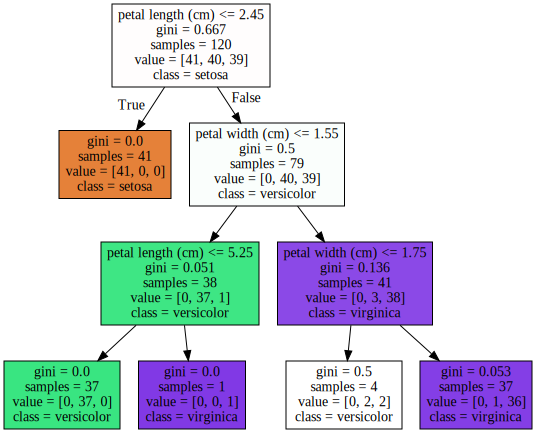

In [20]:
with open("tree_md3.dot") as f :
    dot_graph = f.read()
graphviz.Source(dot_graph)

$\rightarrow$ 트리 깊이가 설정된 `max_depth`에 따라 줄어들면서 더 간단한 결정 트리가 된다.

In [21]:
# 정확도 확인
pred_md3 = dt_clf_md3.predict(X_test)
print('max_depth를 3으로 한 DecisionTreeClassifier의 정확도 : {:.4f}'.format(accuracy_score(pred_md3, y_test)))

max_depth를 3으로 한 DecisionTreeClassifier의 정확도 : 0.9333


$\rightarrow$ 정확도의 변화가 없다.

<br>

### 3.2.2 `min_samples_split`

`min_samples_split` 하이퍼 파라미터 변경에 따른 규칙 트리의 변화 확인.  
`min_samples_split` : 자식 규칙 노드를 분할해 만들기 위한 최소한의 샘플 데이터 개수.  
`min_samples_split=4`로 설정한 결정 트리 시각화

In [22]:
dt_clf_mss4 = DecisionTreeClassifier(min_samples_split=4, random_state=156)

dt_clf_mss4.fit(X_train, y_train)

export_graphviz(dt_clf_mss4, out_file="tree_mss4.dot",
                class_names=iris_data.target_names,
                feature_names=iris_data.feature_names,
                impurity=True,
                filled=True)

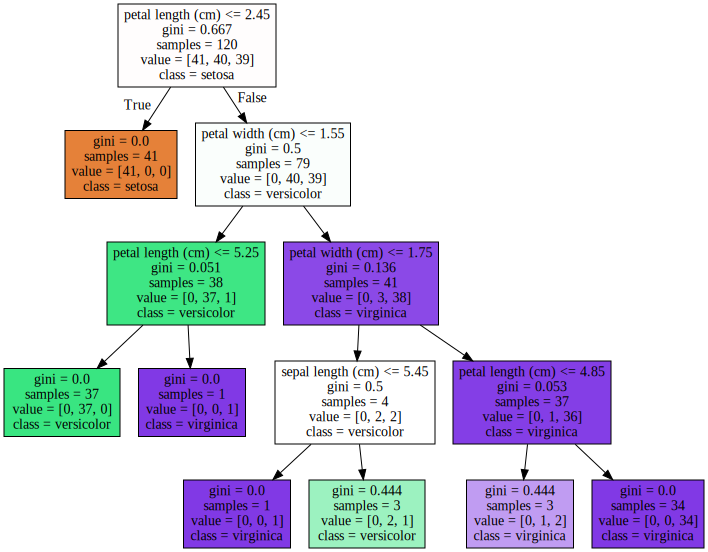

In [23]:
with open("tree_mss4.dot") as f :
    dot_graph = f.read()
graphviz.Source(dot_graph)

<br>

<div style="text-align: left; margin-left: 30px;">
    <img src="./images/Ch04/02/img004.jpg" width="400px"/>
</div>

위 노드를 살펴 보면 `samples = 3` 인데 이 노드 안에 value가 `[0, 2, 1]`, `[0, 1, 2]`로 서로 상이한 클래스 값이 있어도 더 이상 분할하지 않고 리프 노드가 됨.  
(자식 노드로 분할하려면 최소한 샘플 개수가 4개는 필요한 데 3개 밖에 없기 때문)

In [25]:
# 정확도 확인
pred_mss4 = dt_clf_mss4.predict(X_test)
print('min_samples_split을 4로 한 DecisionTreeClassifier의 정확도 : {:.4f}'.format(accuracy_score(pred_mss4, y_test)))

min_samples_split을 4로 한 DecisionTreeClassifier의 정확도 : 0.9333


<br>

### 3.2.3 `min_samples_leaf`

더 이상 자식 노드가 없는 리프 노드 $\rightarrow$ 클래스의 결정 값이 됨.  
`min_samples_leaf` : 이 리프 노드가 될 수 있는 샘플 데이터 건수의 최소값 지정  
리프 노드가 될 수 있는 조건의 default = 1  
`min_samples_leaf`의 값을 키우면 리프 노드가 될 수 있는 조건 완화  
(`min_samples_leaf` <= 지정 값 기준만 만족하면 리프 노드가 될 수 있음)  
`min_samples_leaf` 값을 변경하면 **규칙 조건이 변함**

In [27]:
dt_clf_msl4 = DecisionTreeClassifier(min_samples_leaf=4, random_state=156)

dt_clf_msl4.fit(X_train, y_train)

export_graphviz(dt_clf_msl4, out_file="tree_msl4.dot",
                class_names=iris_data.target_names,
                feature_names=iris_data.feature_names,
                impurity=True,
                filled=True)

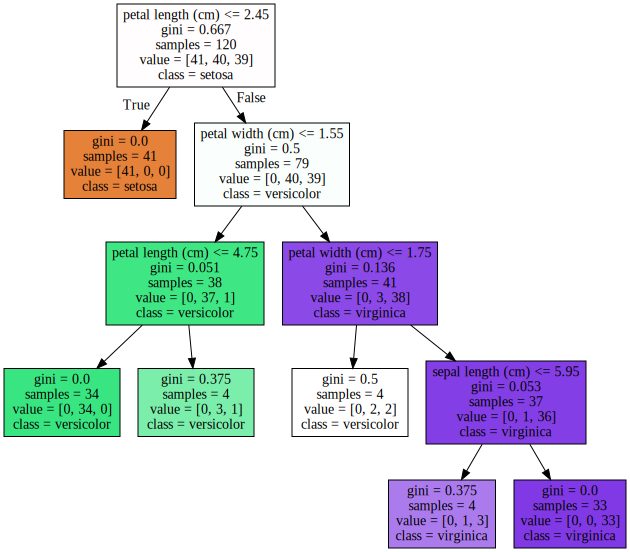

In [28]:
with open("tree_msl4.dot") as f :
    dot_graph = f.read()
graphviz.Source(dot_graph)

$\rightarrow$ sample이 4 이하인 노드는 리프 클래스 노드가 될 수 있으므로 규칙이 sample 4인 노드를 만들 수 있는 상황을 반영하여 변경됨

<br>

## 3.3 `feature_importances_`

결정 트리는 균일도에 기반해 어떠한 속성을 규칙 조건으로 선택하느냐가 중요한 요건.  
중요한 몇 개의 피처가 명확한 규칙 트리를 만드는 데 크게 기여.  
모델을 좀 더 간결하고 이상치(Outlier)에 강한 모델을 만들 수 있음

<br>

`DecisionTreeClassifier` 객체의 `feature_importances_` 속성을 통해 결정 트리 알고리즘이 학습을 통해 규칙을 정하는 데 있어 피처의 중요한 역할 지표 확인 가능

`feature_importances_`는 `ndarray` 형태로 값을 반환  
피처 순서대로 값이 할당 됨  
각각의 값은 각 피처의 중요도를 나타냄 (값이 클수록 중요도가 높다.)

Feature importances:
[0.025 0.    0.555 0.42 ]

sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


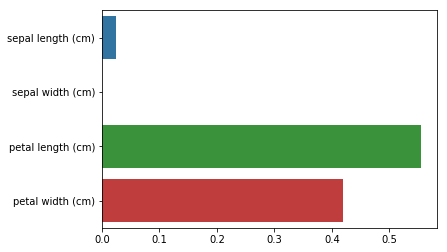

In [33]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))
print()

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_) :
    print("{0} : {1:.3f}".format(name, value))
    
# feature importance를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

$\rightarrow$ `petal length`가 가장 피처 중요도가 높음

<br>

# 4. 결정 트리 과적합(Overfitting)

결정 트리가 어떻게 학습 데이터를 분할해 예측을 수행하는 지 확인

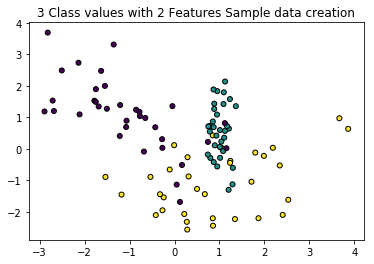

In [40]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                           n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스는 다른 색깔로 표시됨
plt.scatter(X_features[:,0], X_features[:,1], marker="o", c=y_labels, s=25, edgecolor="k")

plt.show()

<br>

생성된 데이터 세트를 기반으로 결정 트리 학습

In [42]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

C:\Users\shkim\AppData\Local\conda\conda\envs\TF_VS_36\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


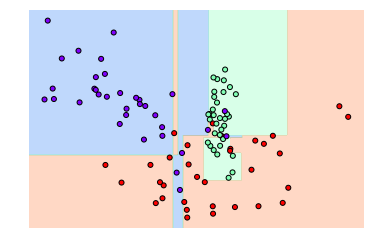

In [43]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

$\rightarrow$ 일부 이상치(Outlier) 데이터까지 분류하기 위해 결정 기준 경계가 매우 많아짐

<br>

`min_samples_leaf = 6`을 설정해 6개 이하의 데이터는 리프 노드를 생성할 수 있도록 리프 노드 생성 규칙을 완화한 후 결정 경계 확인

C:\Users\shkim\AppData\Local\conda\conda\envs\TF_VS_36\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


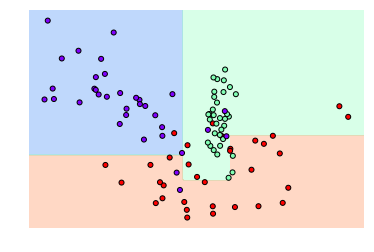

In [44]:
# min_samples_leaf = 6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

$\rightarrow$ 이상치에 크게 반응하지 않으면서 좀 더 일반화된 분류 규칙에 따라 분류됐음을 확인

<br>

# 5. 결정 트리 실습 - 사용자 행동 인식 데이터 세트

결정 트리를 이용해 UCI 머신러닝 리포지토리(Machine Learning Repository)에서 제공하는 사용자 행동 인식(Human Activity Recognition) 데이터 세트에 대한 예측 분류 수행

**데이터 셋 설명**

- 30명에게 스마트폰 센서 장착
- 사람의 동작과 관련된 여러 가지 피처를 수집한 데이터
- 피처는 모두 561개

<br>

## 5.1 데이터셋 생성

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드
feature_name_df = pd.read_csv('./data/human_activity/features.txt', sep='\s+',
                              header=None, names=['column_index', 'column_name'])

# 피처명 index를 제거, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출 : ', feature_name[:10])

전체 피처명에서 10개만 추출 :  ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


$\rightarrow$ 인체의 움직임과 관련된 속성의 평균/표준편차가 X, Y, Z 축 값으로 돼 있음을 유추

<br>

In [48]:
import pandas as pd

def get_human_dataset() :
    
    # 각 데이터 파일들을 공백으로 분리 -> read_csv에서 공백 문자를 sep으로 할당
    feature_name_df = pd.read_csv('./data/human_activity/features.txt', sep='\s+',
                                  header=None, names=['column_index', 'column_name'])
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 변환
    feature_name = feature_name_df.iloc[:,1].values.tolist()
    
    # 학습 피처 데이터 세트와 테스트 피처 데이터를 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./data/human_activity/train/X_train.txt', sep='\s+', names=feature_name)
    X_test = pd.read_csv('./data/human_activity/test/X_test.txt', sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./data/human_activity/train/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('./data/human_activity/test/y_test.txt', sep='\s+', header=None, names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test

In [49]:
X_train, X_test, y_train, y_test = get_human_dataset()

C:\Users\shkim\AppData\Local\conda\conda\envs\TF_VS_36\lib\site-packages\pandas\io\parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)
C:\Users\shkim\AppData\Local\conda\conda\envs\TF_VS_36\lib\site-packages\pandas\io\parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


In [51]:
print('## 학습 피처 데이터셋 info() ##')
print(X_train.info())

## 학습 피처 데이터셋 info() ##
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


$\rightarrow$ 7352개의 레코드  
$\rightarrow$ 561개의 피처  
$\rightarrow$ 피처 전부 `float64` 형의 숫자 $\Rightarrow$ 별도의 카테고리 인코딩을 필요 없음

In [52]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


$\rightarrow$ 각 레이블 값의 분포도는 특정 값으로 왜곡되지 않고 비교적 고르게 분포되어 있음

<br>

## 5.2 동작 예측 분류 수행

### 5.2.1 하이퍼 파라미터 기본값으로 수행

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("결정 트리 예측 정확도 : {0:.4f}".format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print("DecisionTreeClassifier 기본 하이퍼 파라미터 : \n", dt_clf.get_params())

결정 트리 예측 정확도 : 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터 : 
 {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 156, 'splitter': 'best'}


$\rightarrow$ 정확도 : 85.48%

<br>

### 5.2.2 `GridSearchCV` 이용 `max_depth` 변화

In [56]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [6, 8, 10, 12, 16, 20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print("GridSearchCV 최고 평균 정확도 수치 : {0:.4f}".format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.6min finished


GridSearchCV 최고 평균 정확도 수치 : 0.8526
GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 8}


$\rightarrow$ `max_depth=8` 일 떄 5개 폴드 세트의 평균 정확도 : 85.26%

<br>

5개의 CV 세트에서 `max_depth` 값에 따라 어떻게 예측 성능이 변했는 지 확인

In [63]:
# GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']] # mean_train_score

,param_max_depth,mean_test_score
0,6,0.850925
1,8,0.852557
2,10,0.850925
3,12,0.844124
4,16,0.852149
5,20,0.851605
6,24,0.850245


$\rightarrow$ 검증 데이터 세트에서는 `max_depth=8` 일 때 0.852로 정확도가 정점이고, 이후 계속 감소함

<br>

테스트 데이터 세트에서 `max_depth`의 변화에 따른 값을 측정

In [64]:
max_depths = [6, 8, 10, 12, 16, 20, 24]

# max_depth 값을 변화시키면서 그때마다 학습과 테스트 세트에서의 예측 성능 측정
for depth in max_depths :
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_depth = {0} 정확도 : {1:.4f}'.format(depth, accuracy))

max_depth = 6 정확도 : 0.8558
max_depth = 8 정확도 : 0.8707
max_depth = 10 정확도 : 0.8673
max_depth = 12 정확도 : 0.8646
max_depth = 16 정확도 : 0.8575
max_depth = 20 정확도 : 0.8548
max_depth = 24 정확도 : 0.8548


$\rightarrow$ `max_depth`가 8일 경우 약 87.07%로 가장 높은 정확도를 나타냄  
$\rightarrow$ 그 이후로는 정확도가 계속 감소

<br>

### 5.2.3 GridSearchCV 이용 `max_depth`, `min_samples_split` 함께 변화

In [65]:
params = {
    'max_depth': [8, 12, 16, 20],
    'min_samples_split': [16, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치 : {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  2.0min finished


GridSearchCV 최고 평균 정확도 수치 : 0.8550
GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 8, 'min_samples_split': 16}


$\rightarrow$ `max_depth=8`, `min_samples_split=16` 일 때 가장 최고의 정확도로 85.5%를 나타냄

<br>

최적 하이퍼 파라미터를 이용 분류기를 이용해 테스트 데이터 세트에 예측 수행  
(`grid_cv`의 `best_estimator_` 속성에는 최적의 하이퍼 파라미터로 학습된 Estimator 객체가 저장되어 있음)

In [67]:
best_dt_clf = grid_cv.best_estimator_
pred1 = best_dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))

결정 트리 예측 정확도 : 0.8717


$\rightarrow$ `max_depth=8`, `min_samples_split=16` 일 때 테스트 데이터 세트의 정확도는 약 87.17%

<br>

## 5.3 피처 중요도 확인

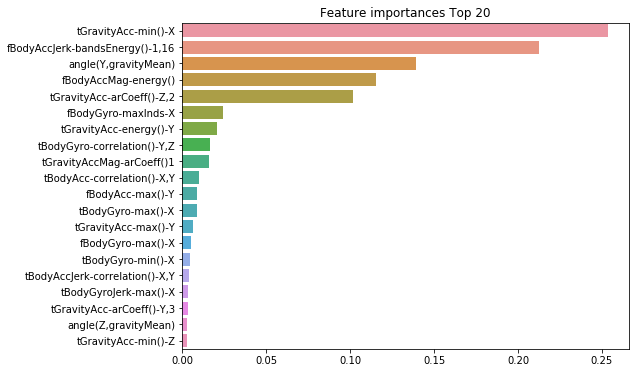

In [68]:
import seaborn as sns

ftr_importances_values = best_dt_clf.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series 변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)

# 중요도 순으로 Series 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

$\rightarrow$ 가장 높은 중요도를 가진 Top 5 피처들이 매우 중요하게 규칙 생성에 영향을 미치고 있는 것 확인